In [1]:
import pandas as pd
# Cargar los archivos CSV desde el directorio anterior
noSolutionDF = pd.read_csv('../nosolcomas.csv')
solutionDF = pd.read_csv('../solcomas.csv')
#noSolutionDF = pd.read_csv('output_nosol - copia 2.csv')
#solutionDF = pd.read_csv('output_sol - copia 2.csv')

In [2]:
import numpy as np

noSolutionCount = noSolutionDF.shape[0]
solutionCount = solutionDF.shape[0]

print(noSolutionCount)
print(solutionCount)

noSolutionLabel = [0] * noSolutionCount*6
solutionLabel = [1] * solutionCount *6
Y = noSolutionLabel + solutionLabel
Y = np.array(Y) 
print(Y)

1340
1499
[0 0 0 ... 1 1 1]


In [3]:
boards = []

for indice, fila in noSolutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)
  
    
print(boards)
for indice, fila in solutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)

#print(boards)

[[[' ', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'], [' ', ' ', '#', ' ', ' ', ' ', '#', '$', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'], [' ', ' ', '#', ' ', '$', ' ', '$', ' ', ' ', ' ', '$', ' ', '#', '$', ' ', '#'], [' ', ' ', '#', ' ', '#', '$', '#', ' ', '#', '#', '#', ' ', ' ', '$', ' ', '#'], [' ', ' ', '#', ' ', '#', ' ', '.', '.', '.', '.', '.', '#', '#', '$', '#', '#'], [' ', ' ', '#', ' ', ' ', '.', '.', '.', '+', '.', '.', ' ', ' ', '$', ' ', '#'], ['#', '#', '#', '#', '$', '#', ' ', '.', '.', '.', '.', '#', ' ', '#', ' ', '#'], ['#', ' ', ' ', ' ', ' ', '#', '#', '#', '#', ' ', '#', '$', '$', '$', ' ', '#'], ['#', ' ', '$', '#', ' ', ' ', ' ', ' ', ' ', '$', ' ', '$', ' ', '#', ' ', '#'], ['#', ' ', '$', ' ', '.', '.', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'], ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']], [[' ', ' ', ' ', '#', '#', '#', '#', '#', '#', '#', '#', ' ', ' ', ' '], [' ', ' ', ' ', '#', '

In [4]:
def Rotate_90(tablero):
    return np.rot90(tablero, k=1)

def Rotate_180(tablero):
    return np.rot90(tablero, k=2)

def Rotate_270(tablero):
    return np.rot90(tablero, k=3)

def FlipX(tablero):
    return np.fliplr(tablero)

def FlipY(tablero):
    return np.flipud(tablero)

# Data augmentation
aug_boards = []
for board in boards:
    board_np = np.array(board)
    aug_boards.append(board_np)  
    aug_boards.append(Rotate_90(board_np))  
    aug_boards.append(Rotate_180(board_np)) 
    aug_boards.append(Rotate_270(board_np))  
    aug_boards.append(FlipX(board_np))  
    aug_boards.append(FlipY(board_np))  

print("El tamaño de la lista `boards` es:", len(aug_boards))
with np.printoptions(threshold=np.inf):
    print(aug_boards[3])

El tamaño de la lista `boards` es: 17034
[['#' '#' '#' '#' '#' ' ' ' ' ' ' ' ' ' ' ' ']
 ['#' ' ' ' ' ' ' '#' ' ' ' ' ' ' ' ' ' ' ' ']
 ['#' '$' '$' ' ' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' '#' ' ' '#' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' '.' ' ' ' ' '$' ' ' '#' '#' '$' ' ' '#']
 ['#' '.' ' ' '#' '#' '.' ' ' '$' ' ' ' ' '#']
 ['#' '#' ' ' '#' ' ' '.' '.' '#' '$' '#' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' ' ' ' ' '$' '#']
 ['#' ' ' ' ' '#' '.' '+' '.' '#' ' ' ' ' '#']
 ['#' ' ' '$' ' ' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' '#' '$' ' ' '#']
 ['#' ' ' '$' '$' '#' ' ' '#' ' ' ' ' ' ' '#']
 ['#' ' ' ' ' '$' ' ' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' '$' '#' '$' '$' '$' '$' ' ' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' ' ' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]


In [5]:
import numpy as np
count = 0
def tablero_a_tensor(tablero):
    alto = len(tablero)
    ancho = len(tablero[0])
    tensor = np.zeros((alto, ancho, 7))

    for i in range(alto):
        for j in range(ancho):
            elemento = tablero[i][j]
            if elemento == '#':
                tensor[i, j, 0] = 1
            elif elemento == '$':
                tensor[i, j, 1] = 1
            elif elemento == '.':
                tensor[i, j, 2] = 1
            elif elemento == '@':
                tensor[i, j, 3] = 1
            elif elemento == '*':
                tensor[i, j, 4] = 1
            elif elemento == '+':
                tensor[i, j, 5] = 1
            elif elemento == ' ':
                tensor[i, j, 6] = 1
                
    return tensor

X = [tablero_a_tensor(tablero) for tablero in aug_boards]

max_height = max(tensor.shape[0] for tensor in X)
max_width = max(tensor.shape[1] for tensor in X)
print(f"-> {max_height}")
print(f"-> {max_width}")

X_padded = np.zeros((len(X), max_height, max_width, 7))
additional_row = np.array([0, 0, 0, 0, 0, 0, 1])

for idx, tensor in enumerate(X):
    height = tensor.shape[0]
    width = tensor.shape[1]
    
    X_padded[idx, :height, :width, :] = tensor
    # Añade hasta alcanzar el alto maximo
    for h in range(height, max_height):
        X_padded[idx, h, :7, :] = additional_row
    # ancho
    for w in range(width, max_width):
        X_padded[idx, :height, w, :] = additional_row



with np.printoptions(threshold=np.inf):
    print(aug_boards[1])
    print(X[1])
    print("-----------------\n")
    print(X_padded[1])
        


-> 37
-> 37
[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' '#' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' ' ' '$' '$' '$' '$' '#' '$' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' ' ' '$' ' ' ' ' '#']
 ['#' ' ' ' ' ' ' '#' ' ' '#' '$' '$' ' ' '#']
 ['#' ' ' '$' '#' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' ' ' '$' ' ' '#']
 ['#' ' ' ' ' '#' '.' '+' '.' '#' ' ' ' ' '#']
 ['#' '$' ' ' ' ' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' '#' '$' '#' '.' '.' ' ' '#' ' ' '#' '#']
 ['#' ' ' ' ' '$' ' ' '.' '#' '#' ' ' '.' '#']
 ['#' ' ' '$' '#' '#' ' ' '$' ' ' ' ' '.' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' '#' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' ' ' '$' '$' '#']
 [' ' ' ' ' ' ' ' ' ' ' ' '#' ' ' ' ' ' ' '#']
 [' ' ' ' ' ' ' ' ' ' ' ' '#' '#' '#' '#' '#']]
[[[1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.5471 - loss: 0.6743 - val_accuracy: 0.5339 - val_loss: 0.6763
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5829 - loss: 0.6525 - val_accuracy: 0.5665 - val_loss: 0.6549
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.5978 - loss: 0.6385 - val_accuracy: 0.6325 - val_loss: 0.6191
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.6203 - loss: 0.6283 - val_accuracy: 0.6334 - val_loss: 0.6212
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.6405 - loss: 0.6184 - val_accuracy: 0.5853 - val_loss: 0.6921
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.6849 - loss: 0.5880 - val_accuracy: 0.6974 - val_loss: 0.5594
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7031 - loss: 0.5672 - val_accuracy: 0.7259 - val_loss: 0.5260
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.7152 - loss: 0.5489 - 

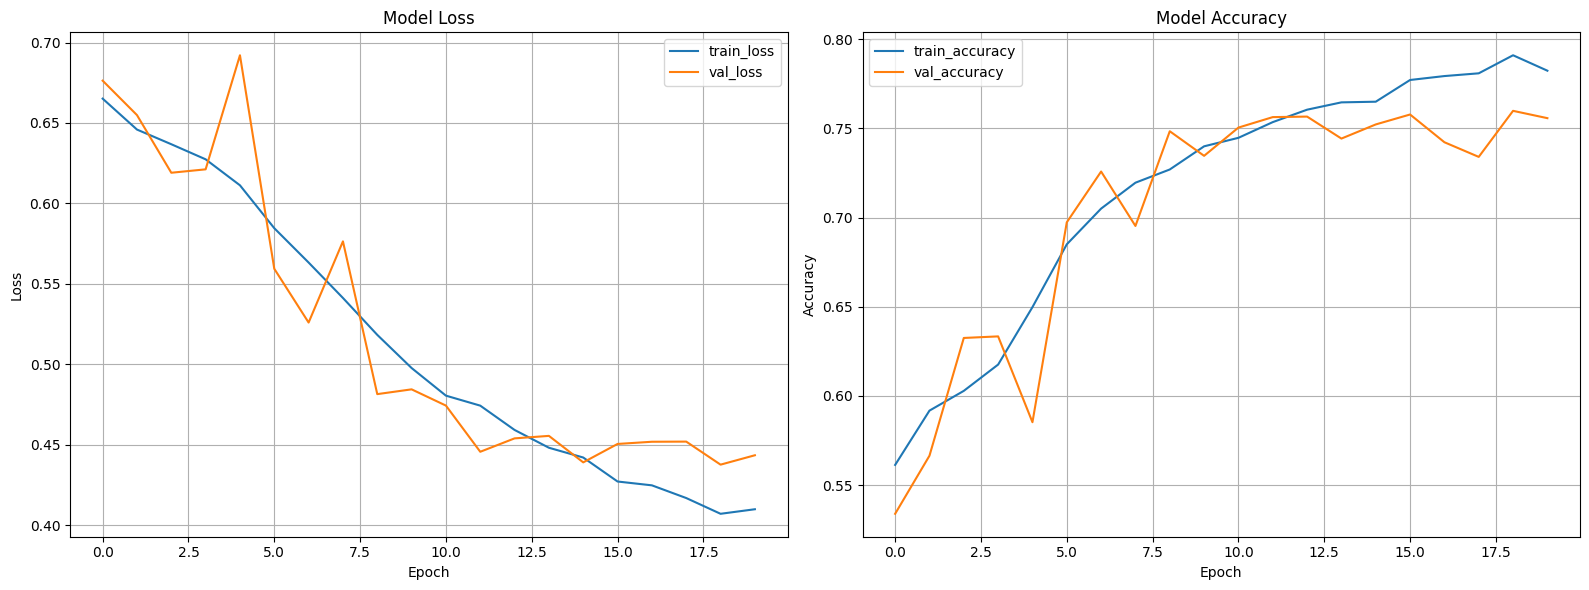

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D, AveragePooling2D, ReLU,GlobalAveragePooling2D,Flatten, Dense, Input, BatchNormalization, Dropout, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=0.2, random_state=23)

maxEpochs = 20

max_height = X_padded.shape[1]
max_width = X_padded.shape[2]
channels = X_padded.shape[3]
input_shape = (max_height, max_width, channels)

'''input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)
x = Dropout(0.25)(x)
# conv2d que transforma todo a x * y * 64
x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
#Condensa todos los valores de x * y * 1 a un solo valor 
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)
'''

input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
#Condensa todos los valores de x * y * 1 a un solo valor 
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=maxEpochs, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Graficar la pérdida y precisión lado a lado
plt.figure(figsize=(16, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

Training fold 1 ...
Epoch 1/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.5313 - loss: 0.6753 - val_accuracy: 0.4889 - val_loss: 0.6927
Epoch 2/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5729 - loss: 0.6558 - val_accuracy: 0.6127 - val_loss: 0.6405
Epoch 3/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.5860 - loss: 0.6454 - val_accuracy: 0.5868 - val_loss: 0.6553
Epoch 4/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5944 - loss: 0.6448 - val_accuracy: 0.6030 - val_loss: 0.6536
Epoch 5/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6083 - loss: 0.6281 - val_accuracy: 0.6080 - val_loss: 0.6396
Epoch 6/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.6239 - loss: 0.6284 - val_accuracy: 0.6522 - val_loss: 0.6082
Epoch 7/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.6472 - loss: 0.6151 - val_accuracy: 0.6775 - val_loss: 0.5721
Epoch 8/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.67

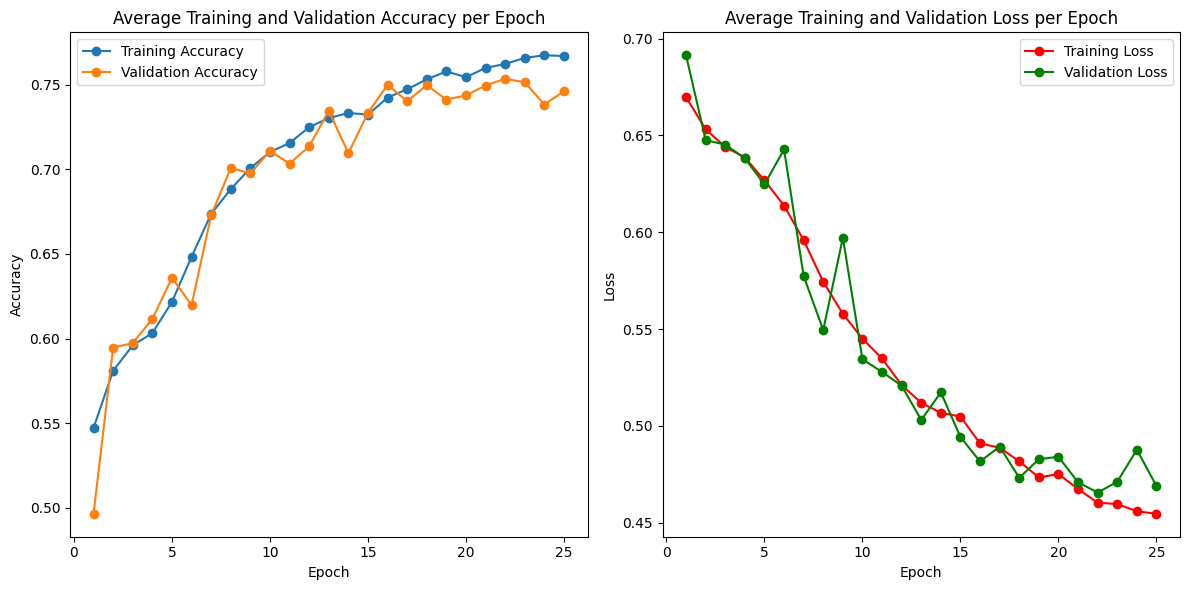

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Dropout, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Asumiendo que X_padded y Y están definidos
X = X_padded
Y = Y

maxEpochs = 25

max_height = X_padded.shape[1]
max_width = X_padded.shape[2]
channels = X_padded.shape[3]
input_shape = (max_height, max_width, channels)

# KFold Cross-Validation
k = 3  # Puedes cambiar el número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

# Variables para almacenar los historiales de los folds
all_accuracy = []
all_val_accuracy = []
all_loss = []
all_val_loss = []

fold_no = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
    x = Dropout(0.3)(x)
    #Condensa todos los valores de x * y * 1 a un solo valor 
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)



    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    print(f'Training fold {fold_no} ...')
    history = model.fit(X_train, Y_train, epochs=maxEpochs, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

    # Guardar el historial
    all_accuracy.append(history.history['accuracy'])
    all_val_accuracy.append(history.history['val_accuracy'])
    all_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    
    fold_no += 1

# Convertir listas a arrays para calcular el promedio
all_accuracy = np.array(all_accuracy)
all_val_accuracy = np.array(all_val_accuracy)
all_loss = np.array(all_loss)
all_val_loss = np.array(all_val_loss)

# Calcular promedios
mean_accuracy = np.mean(all_accuracy, axis=0)
mean_val_accuracy = np.mean(all_val_accuracy, axis=0)
mean_loss = np.mean(all_loss, axis=0)
mean_val_loss = np.mean(all_val_loss, axis=0)

# Verificar las formas
print(f'epochs: {len(range(1, maxEpochs+1))}, mean_accuracy: {mean_accuracy.shape}')
print(f'mean_accuracy: {mean_accuracy}')
print(f'mean_val_accuracy: {mean_val_accuracy}')
print(f'mean_loss: {mean_loss}')
print(f'mean_val_loss: {mean_val_loss}')

# Graficar las métricas
epochs = range(1, maxEpochs+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, mean_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, mean_val_accuracy, 'o-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mean_loss, 'o-', label='Training Loss', color='r')
plt.plot(epochs, mean_val_loss, 'o-', label='Validation Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()
